<br><br>

## 1. 10개의 스쿼트 동작 동영상->이미지로 추출

In [1]:
# PATH = 'C:/Users/Playdata/Desktop/playdata/python/project/dataset/dasol_squat/'

In [3]:
# for no, p in enumerate(os.listdir(PATH)):
#     video = cv2.VideoCapture(PATH + p)

#     width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
#     height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
#     count = video.get(cv2.CAP_PROP_FRAME_COUNT)
#     fps = video.get(cv2.CAP_PROP_FPS)

#     print(f'===== {p} =====')
#     print('가로: ', str(width))
#     print('세로: ', str(height))
#     print('총 프레임수: ', str(count))
#     print('FPS: ' + str(fps))
#     print()

===== dasol_squat_10_01.mov =====
가로:  1280.0
세로:  720.0
총 프레임수:  89.0
FPS: 29.782487451199106

===== dasol_squat_10_02.mov =====
가로:  1280.0
세로:  720.0
총 프레임수:  106.0
FPS: 26.390041493775932

===== dasol_squat_10_03.mov =====
가로:  1280.0
세로:  720.0
총 프레임수:  106.0
FPS: 26.466916354556805

===== dasol_squat_10_04.mov =====
가로:  1280.0
세로:  720.0
총 프레임수:  110.0
FPS: 26.50602409638554

===== dasol_squat_10_05.mov =====
가로:  1280.0
세로:  720.0
총 프레임수:  99.0
FPS: 29.59641255605381

===== dasol_squat_10_06.mov =====
가로:  1280.0
세로:  720.0
총 프레임수:  110.0
FPS: 29.023746701846967

===== dasol_squat_10_07.mov =====
가로:  1280.0
세로:  720.0
총 프레임수:  104.0
FPS: 26.896551724137932

===== dasol_squat_10_08.mov =====
가로:  1280.0
세로:  720.0
총 프레임수:  102.0
FPS: 26.71322566564819

===== dasol_squat_10_09.mov =====
가로:  1280.0
세로:  720.0
총 프레임수:  113.0
FPS: 27.076677316293928

===== dasol_squat_10_10.mov =====
가로:  1280.0
세로:  720.0
총 프레임수:  87.0
FPS: 29.0



### 1. 모든 동영상에서 모든 프레임을 리스트에 저장하기

In [13]:
import cv2
import os

lst_all = [] # 전체 영상 이미지들을 저장할 리스트 (10랩스 * 30장)
lst = [] # 1랩스의 이미지들을 저장할 리스트 (30장)

PATH = 'C:/Users/Playdata/Desktop/playdata/python/project/dataset/dasol_squat/' # 저장된 동영상 경로

for no, p in enumerate(os.listdir(PATH)):
    video = cv2.VideoCapture(PATH + p)
    count_frame = int(video.get(cv2.CAP_PROP_FRAME_COUNT)) # 영상의 프레임 개수 (= 추출 가능한 최대 이미지 개수)
    fps = video.get(cv2.CAP_PROP_FPS)

    count = 0 # 이미지 넘버링
    while(video.isOpened()):
        ret, frame = video.read() 
        if not ret:
            print(ret, count)
            break

        if ret:
            lst.append(frame)
            count += 1
        
    lst_all.append(lst)
    lst = []

    video.release()
    
num = 0
for i in lst_all:
    num += len(i)
print(f'end, {len(lst_all)} videos and {num} images were saved')

False 89
False 90
False 91
False 93
False 96
False 104
False 90
False 89
False 99
False 84
end, 10 videos and 925 images were saved


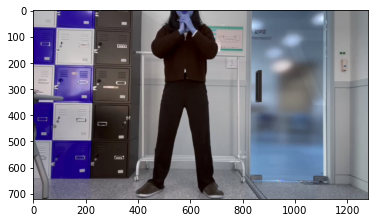

In [15]:
# 잘 저장되었는지 결과 확인

import matplotlib.pyplot as plt

plt.imshow(lst_all[0][0]);

### 2. 불러온 이미지들을 원하는 개수만큼 균일한 비율만큼 추출해 저장하기

In [ ]:
import numpy as np

for no in range(len(lst_all)):
    directory = 'C:/Users/Playdata/Desktop/playdata/python/project/dataset/dasol_squat_img/' # 추출할 이미지들을 저장할 경로
    make_dir = os.mkdir(f'./dataset/dasol_squat_img/no{no+1}') # 각 랩스별 폴더 생성
    temp_dir = f'no{no+1}/'

    count_frame = len(lst_all[no])
    
    img_count = 30 # 각 랩스 당 추출하고 싶은 이미지 개수 (= 30개)
    skip = count_frame / img_count

    print(no, count_frame, skip)
    babo = 0 # 이미지 넘버링

    for cnt in range(len(lst_all[no])):
        if cnt == np.floor(skip * babo):
            babo += 1
            path = directory + temp_dir + f'img_{no+1}_' + str(babo) + '.jpg' # 해당 경로에 추출한 이미지를 저장.
            frame = lst_all[no][cnt]
#             print(f'babo = {babo}')
            cv2.imwrite(path, frame)

### 결과

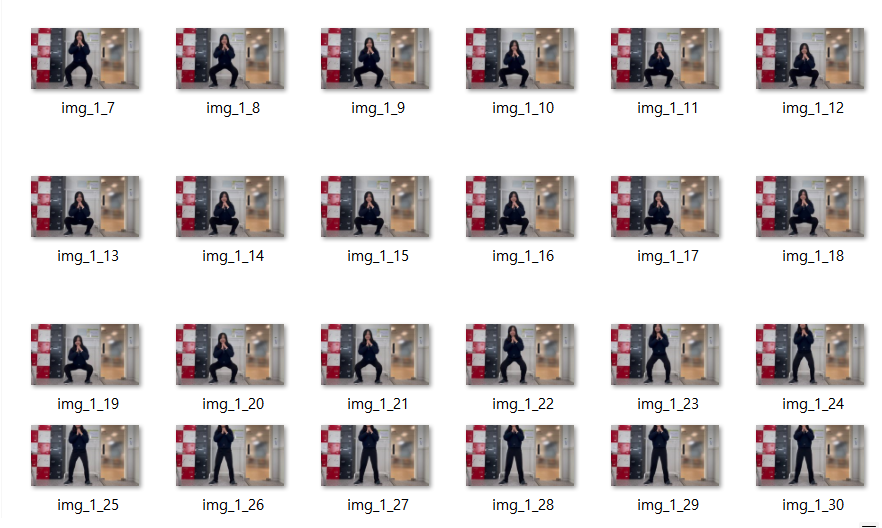